In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 1. EDA

Read Data

In [2]:
raw_data = pd.read_csv(r"day.csv")
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
raw_data.shape, raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


((730, 16), None)

In [4]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
raw_data.isnull().sum() #no null values


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
(raw_data['casual'] + raw_data['registered'] - raw_data['cnt']).sum() # The target variable cnt is sum of casual and registered, so it can be ignored

0

In [7]:
numeric_var = ['temp','atemp', 'hum', 'windspeed']
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
target_var = ['cnt']
id_var = ['instant','dteday']

### Univariate and Bivariate Analysis

In [8]:
#correlation
corr_mat = raw_data[numeric_var].corr().unstack().reset_index()
corr_mat[corr_mat['level_0']>corr_mat['level_1']] 

,level_0,level_1,0
1,temp,atemp,0.991696
2,temp,hum,0.128565
9,hum,atemp,0.141512
12,windspeed,temp,-0.158186
13,windspeed,atemp,-0.183876
14,windspeed,hum,-0.248506


Temp and atemp are highly correlated. Drop one of them.

In [9]:
drop_var = ['atemp']

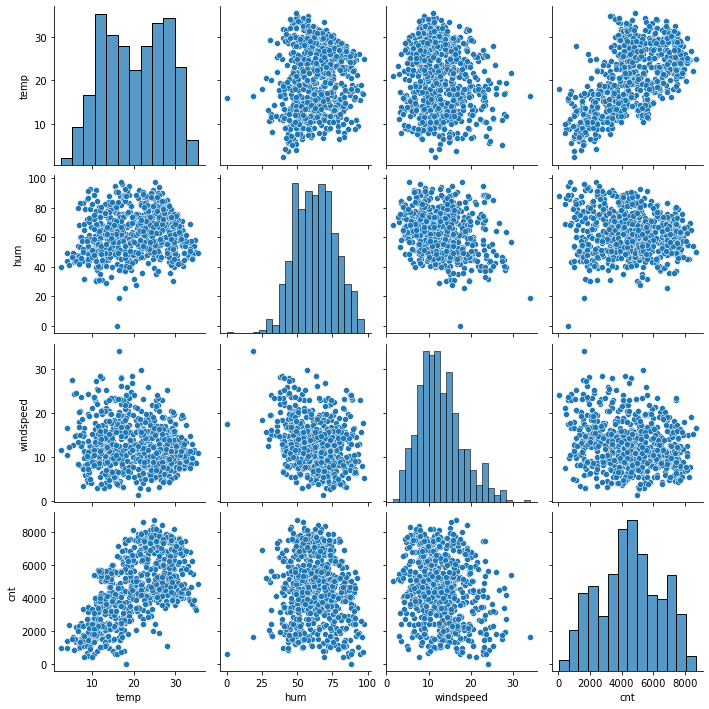

In [37]:
sns.pairplot(raw_data[numeric_var+target_var]) # Pair Plot

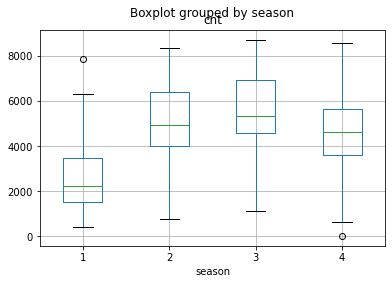

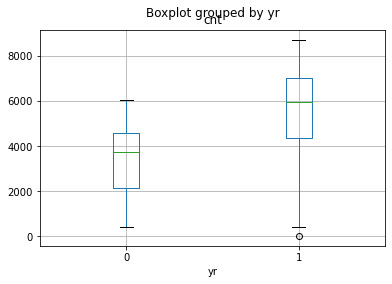

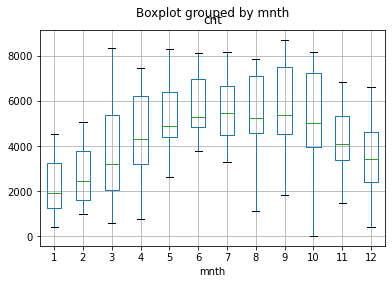

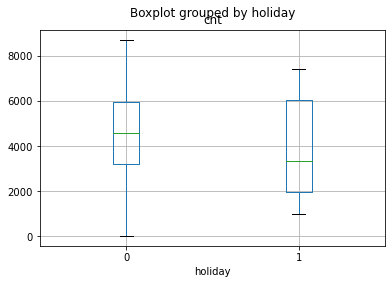

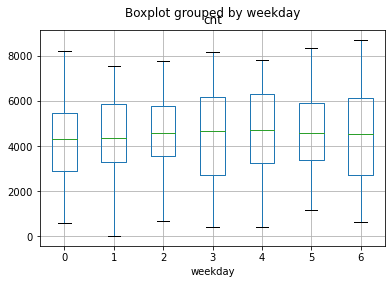

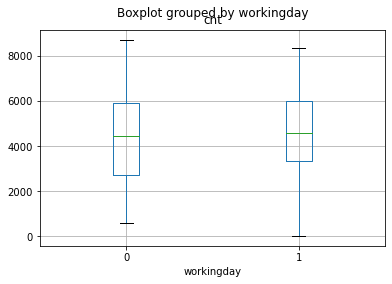

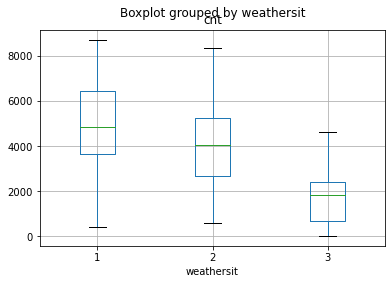

In [10]:
for i in cat_var:
    raw_data.boxplot(by=i,column='cnt')

Insights
1. Lesser demand in Spring.
2. Higher demand in year 2019.
3. Lesser demand in winter months.
4. Higher demand during holidays.
5. Lesser demand when its snowing. Do not see any data with Weather Category 4


### Generate dummy variables and join to main dataset

In [11]:
season_dummies = pd.get_dummies(raw_data['season'], prefix='season',drop_first= True)
mnth_dummies = pd.get_dummies(raw_data['mnth'], prefix='mnth',drop_first= True)
weekday_dummies = pd.get_dummies(raw_data['weekday'], prefix='weekday',drop_first= True)
weathersit_dummies = pd.get_dummies(raw_data['weathersit'], prefix='weathersit',drop_first= True)

In [12]:
data_clean=pd.concat([raw_data[numeric_var + ['yr','holiday','workingday'] + target_var],season_dummies],axis=1)
data_clean=pd.concat([data_clean,mnth_dummies],axis=1)
data_clean=pd.concat([data_clean,weekday_dummies],axis=1)
data_clean=pd.concat([data_clean,weathersit_dummies],axis=1)


In [13]:
data_clean =data_clean.drop(columns=drop_var)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   hum           730 non-null    float64
 2   windspeed     730 non-null    float64
 3   yr            730 non-null    int64  
 4   holiday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [14]:
numeric_var = [x for x in numeric_var if x not in drop_var]

In [15]:
indep_vars = [x for x in data_clean.columns if x not in target_var]

In [16]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   hum           730 non-null    float64
 2   windspeed     730 non-null    float64
 3   yr            730 non-null    int64  
 4   holiday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [17]:
data_clean.head()

,temp,hum,windspeed,yr,holiday,workingday,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,14.110847,80.5833,10.749882,0,0,0,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,0,0,0,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,0,0,1,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,8.200000,59.0435,10.739832,0,0,1,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,0,0,1,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 2. Modeling

### create model dataset

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_clean[indep_vars], data_clean[target_var], train_size=0.7,test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 28)
(219, 28)
(510, 1)
(219, 1)


### Scaling numeric and target variable

In [19]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [20]:
x_train[numeric_var] = scaler.fit_transform(x_train[numeric_var])
y_train[target_var]=scaler2.fit_transform(y_train[target_var])
x_test[numeric_var]=scaler.transform(x_test[numeric_var])
y_test[target_var]=scaler2.transform(y_test[target_var])

In [21]:
def build_model(X,y):
    X = sm.add_constant(X) #using statsmodels
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    
def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Iteration 1

In [22]:
iter_1_x = build_model(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.11
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.13e-177
Time:                        22:41:54   Log-Likelihood:                 497.13
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     482   BIC:                            -819.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1392      0.034      4.074   

Inference - Many insignificant variables (p >0.05) but good adjusted r-squared. Need Careful variable selection in next iterations

In [23]:
check_vif(x_train)

,Features,VIF
24,weekday_5,inf
23,weekday_4,inf
4,holiday,inf
5,workingday,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
0,temp,47.84
1,hum,20.82
7,season_3,15.95


In [24]:
#inf in vif shows perfect linear combination. Weekdays are perfect linear combination of holidays and working days. Hence lets drop holidays
x_train = x_train.drop(columns = ['holiday'])
x_test = x_test.drop(columns = ['holiday'])

### Iteration2 - RFE

In [25]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(x_train, y_train)
rfe_cols = x_train.columns[rfe.support_].to_list()
rfe_cols, [x_train.columns[~rfe.support_]]

(['temp',
  'hum',
  'windspeed',
  'yr',
  'workingday',
  'season_2',
  'season_3',
  'season_4',
  'mnth_3',
  'mnth_9',
  'mnth_11',
  'mnth_12',
  'weekday_6',
  'weathersit_2',
  'weathersit_3'],
 [Index(['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10',
         'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
        dtype='object')])

In [26]:
iter_2_x = build_model(x_train[rfe_cols], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.72e-187
Time:                        22:41:54   Log-Likelihood:                 488.66
No. Observations:                 510   AIC:                            -945.3
Df Residuals:                     494   BIC:                            -877.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1358      0.032      4.213   

In [27]:
check_vif(iter_2_x)

,Features,VIF
0,const,59.61
7,season_3,5.69
1,temp,4.00
8,season_4,3.16
6,season_2,3.08
2,hum,1.87
11,mnth_11,1.78
5,workingday,1.60
13,weekday_6,1.58
14,weathersit_2,1.58


Looks like we already have a good model. 85% Adj RSquared, All P values less 0.05 and no correlated variables. 
Lets analyse residuals

## 3. Residual Analysis

<AxesSubplot:ylabel='Density'>

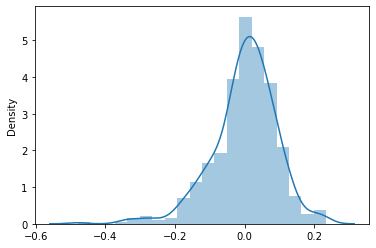

In [28]:
lm1 = sm.OLS(y_train,iter_2_x).fit() 
y_train_pred = lm1.predict(iter_2_x)
fig = plt.figure()
sns.distplot((y_train['cnt'] - y_train_pred), bins = 20)

In [29]:
## Error terms are normal

## 4.Test Prediction

In [30]:
selected_cols = [x for x in iter_2_x.columns if x not in ['const']]

In [31]:
x_test_1 = x_test[selected_cols]
# Adding a constant variable 
x_test_1 = sm.add_constant(x_test_1)

In [32]:
y_test_pred = lm1.predict(x_test_1)

Text(0, 0.5, 'y_pred')

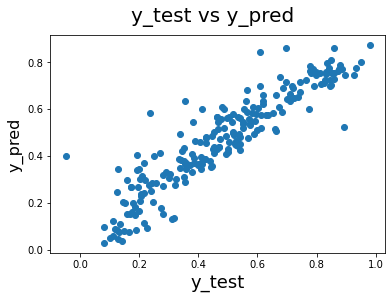

In [33]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8321720926101541

In [35]:
#adjusted r2_score
print(1-(1-r2_score(y_test, y_test_pred))*((len(x_test_1)-1)/(len(x_test_1)-x_test_1.shape[1]-1)))

0.8188787930149188


In [36]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.72e-187
Time:                        22:41:55   Log-Likelihood:                 488.66
No. Observations:                 510   AIC:                            -945.3
Df Residuals:                     494   BIC:                            -877.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1358      0.032      4.213      0.000       0.072       0.199
temp             0.4346      0.037     11.818      0.000       0.362       0.507
hum             -0.1481      0.040     -3.722      0.000      -0.226      -0.070
windspeed       -0.1204      0.025     -4.850      0.000      -0.169      -0.072
yr               0.2364      0.008     27.834      0.000       0.220       0.253
workingday       0.0481      0.011      4.292      0.000       0.026       0.070
season_2         0.1641      0.017      9.784      0.000       0.131       0.197
season_3         0.1207      0.023      5.318      0.000       0.076       0.165
season_4         0.2438      0.017     14.228      0.000       0.210       0.277
mnth_3           0.0483      0.018      2.650      0.008       0.012       0.084
mnth_9           0.0814      0.016      5.037      0.000       0.050       0.113
mnth_11         -0.0784      0.019     -4.066      0.000      -0.116      -0.040
mnth_12         -0.0603      0.018     -3.319      0.001      -0.096      -0.025
weekday_6        0.0563      0.015      3.842      0.000       0.028       0.085
weathersit_2    -0.0605      0.011     -5.488      0.000      -0.082      -0.039
weathersit_3    -0.2357      0.028     -8.357      0.000      -0.291      -0.180
==============================================================================
Omnibus:                       82.830   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.971
Skew:                          -0.869   Prob(JB):                     1.86e-40
Kurtosis:                       5.365   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.Conclusion

Our Equation is 
cnt = 0.1358 * const + 0.4346 * temp - 0.1481 * hum - 0.1204 * windspeed + 0.2364 * yt +  0.0481 * workingday + 
0.1641*season_2 + 0.1207 *season_3 + 0.2438 * season_4 + 0.0483 * mnth_3 + 0.0814 * mnth_9  - 00784 * mnth_11  - 
0.0603 * mnth_12 + 0.0563  * weekday_6 - 0.0605 * weathersit_2 - 0.2357 * weathersit_3

The top 5 variables effecting the count of rentals are :
    1. Temp
    2. Season - 4.Winter , 2.Summer
    3. Weather - 3. LightSnow
    4. year
    5. Humidity

